### Problem 1: Apply the following models on the Fashion Mnist Dataset. Train the model with the training data and evaluate the model with the test data.

### a. CNN model from scratch
Develop a CNN model with 5 convolutional layers (with kernel size= 3, stride =1, padding = “same”, activation function = “relu”) with following MaxPooling layer (Size= 2) and 3 fully connected layer (including one output layer). After each of the Convolutional layer apply Batch Normalization. In the fully connected layer apply dropout (rate 0.50). Show the learning curve. Report performance evaluation on the test data.

### Importing the necessary libraries

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.activations import relu, elu
from tensorflow.keras.callbacks import History
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

### Loading the Fashion Mnist data from keras

In [44]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshaping and preprocessing the training images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255 # Reshape the training images array to have 60,000 samples, each of which is a 28x28 pixel image with a single channel.
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

### Building the CNN model and adding layers

In [46]:
# Create CNN model
model = models.Sequential()

# Adding Convolutional layer 1 with 32 filters, a filter size of (3, 3), using strides of (1, 1), 'same' padding, and ReLU activation. 
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))

# Adding a Batch Normalization layer to normalize the activations of the previous layer.
model.add(layers.BatchNormalization())

# Adding a Max Pooling layer with a pool size of (2, 2) to perform down-sampling.
model.add(layers.MaxPooling2D((2, 2)))

# Adding Convolutional layer 2 with 64 filters
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Adding Convolutional layer 3 with 128 filters
model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

# Adding Convolutional layer 4 with 256 filters
model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

# Adding Convolutional layer 5 with 512 filters
model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

# Flatten the previous layer to convert the data into a 1D array for input into the Dense layers.
model.add(layers.Flatten())

# Adding Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(512, activation='relu'))

# Adding a Dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

#Adding another Dense layer with 256 neurons
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

# Adding a final Dense layer with 10 neurons and softmax activation for multi-class classification.
model.add(layers.Dense(10, activation='softmax'))

### Compile the model

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [49]:
# Train the CNN model on the provided training data and labels for 5 epochs
#using a batch size of 128 and a 20% validation split for monitoring the model's performance.
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 708s 2s/step - loss: 0.8035 - accuracy: 0.7648 - val_loss: 5.5054 - val_accuracy: 0.5455
Epoch 2/5
375/375 [==============================] - 641s 2s/step - loss: 0.3991 - accuracy: 0.8643 - val_loss: 0.3059 - val_accuracy: 0.8867
Epoch 3/5
375/375 [==============================] - 530s 1s/step - loss: 0.3027 - accuracy: 0.8944 - val_loss: 0.2833 - val_accuracy: 0.8956
Epoch 4/5
375/375 [==============================] - 526s 1s/step - loss: 0.2608 - accuracy: 0.9091 - val_loss: 0.2633 - val_accuracy: 0.9034
Epoch 5/5
375/375 [==============================] - 529s 1s/step - loss: 0.2447 - accuracy: 0.9137 - val_loss: 0.2686 - val_accuracy: 0.9095


### Evaluate the model

In [50]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 25s 79ms/step - loss: 0.3067 - accuracy: 0.9018
Test accuracy: 0.9017999768257141


#### The reported accuracy on Test is: 0.9017999768257141

### Learning Curve

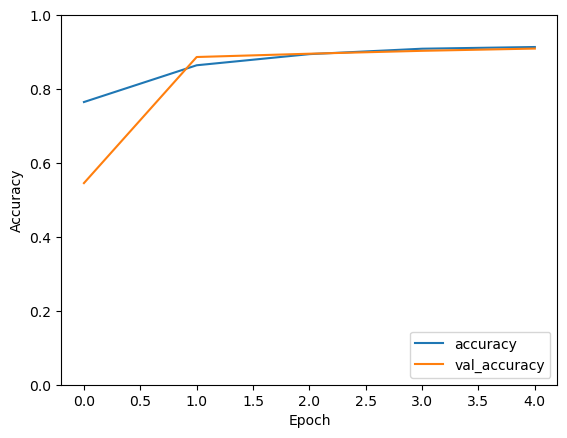

In [51]:
# Plotting the learning curve
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#### Model Summary

In [90]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_184 (B  (None, 28, 28, 32)        128       
 atchNormalization)                                              
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_193 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_185 (B  (None, 14, 14, 64)        256       
 atchNormalization)                                              
                                                     

### b. Apply 5-Fold Cross Validation on the CNN model developed in (a) and report the average accuracy with standard deviation.

#### Importing necessary libraries, loading and pre-processing the Fashion MNIST data as in previous steps

In [79]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
from sklearn.model_selection import KFold

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Creating the CNN model similar to (a)

In [ ]:
# Create the CNN model
def create_model():
    model = models.Sequential()

    # 5 Convolutional layers with Batch Normalization and MaxPooling
    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())


    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())


    model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())


    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### Performing 5-fold cross validation and calculating the avg accuracy and SD

In [60]:
kfold = KFold(n_splits=5, shuffle=True)
accuracies = []

for train_index, test_index in kfold.split(train_images):
    X_train, X_val = train_images[train_index], train_images[test_index]
    y_train, y_val = train_labels[train_index], train_labels[test_index]

    model = create_model()
    model.fit(X_train, y_train, epochs=2, batch_size=128, validation_data=(X_val, y_val))
    _, accuracy = model.evaluate(test_images, test_labels, verbose=2)
    accuracies.append(accuracy)

# Calculate the average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)

print("Average accuracy:", average_accuracy)
print("Standard deviation:", std_deviation)


Epoch 1/2
375/375 [==============================] - 541s 1s/step - loss: 0.7716 - accuracy: 0.7763 - val_loss: 2.4032 - val_accuracy: 0.7273
Epoch 2/2
375/375 [==============================] - 544s 1s/step - loss: 0.4358 - accuracy: 0.8586 - val_loss: 0.4152 - val_accuracy: 0.8808
313/313 - 24s - loss: 0.4192 - accuracy: 0.8776 - 24s/epoch - 77ms/step
Epoch 1/2
375/375 [==============================] - 2246s 6s/step - loss: 0.8204 - accuracy: 0.7650 - val_loss: 1.6018 - val_accuracy: 0.5418
Epoch 2/2
375/375 [==============================] - 546s 1s/step - loss: 0.3934 - accuracy: 0.8686 - val_loss: 0.3915 - val_accuracy: 0.8807
313/313 - 25s - loss: 0.4187 - accuracy: 0.8776 - 25s/epoch - 80ms/step
Epoch 1/2
375/375 [==============================] - 532s 1s/step - loss: 0.8341 - accuracy: 0.7590 - val_loss: 56.4212 - val_accuracy: 0.2085
Epoch 2/2
375/375 [==============================] - 538s 1s/step - loss: 0.4169 - accuracy: 0.8583 - val_loss: 0.3105 - val_accuracy: 0.8914
31

### The Average accuracy is: 0.8812600016593933
### The Standard deviation is: 0.0031525162292539545

#### Model Summary

In [91]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_184 (B  (None, 28, 28, 32)        128       
 atchNormalization)                                              
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_193 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_185 (B  (None, 14, 14, 64)        256       
 atchNormalization)                                              
                                                     

### c. Grid Search
Apply grid search on the CNN model to find the optimal set of hyperparameters that produce the max performance on the test data. You must train the model using the training data and evaluate model performance using the test dataset. Use grid search for hyperparameter tuning with the following:

### Importing necessary libraries, loading and pre-processing the Fashion MNIST data as in previous steps

In [94]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, Adagrad
import itertools

# Load the Fashion MNIST data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

### Grid search for hyperparameter tuning

In [95]:
activation_functions = [tf.nn.relu, LeakyReLU(alpha=0.3)]  # Define activation functions: ReLU and Leaky ReLU.
optimizers = [Adam, Adagrad]  # Define optimizers: Adam and Adagrad.
batch_sizes = [16, 32, 64]  # Define batch sizes to be used during training.
learning_rates = [0.001, 0.0001, 0.00001]  # Define learning rates for the optimizers.


results = {} # Initialize an empty dictionary to store the results of the experiments.

# Iterate through all combinations of activation functions, optimizers, batch sizes, and learning rates.
for activation, optimizer, batch_size, lr in itertools.product(activation_functions, optimizers, batch_sizes, learning_rates):
    model = Sequential()
    
    # 5 CNN Layers
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    
    
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    
    
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(256, activation=activation))
    model.add(Dropout(0.5))
    
    model.add(Dense(128, activation=activation))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    # Compile the model with the selected optimizer, loss function, and metrics.
    model.compile(optimizer=optimizer(lr=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model for 2 epochs and validate it on the test data.
    history = model.fit(train_images, train_labels, epochs=2, batch_size=batch_size, validation_data=(test_images, test_labels))
    _, test_accuracy = model.evaluate(test_images, test_labels)
    
    # Store the test accuracy in the results dictionary with corresponding hyperparameter settings as the key.
    results[(activation.__name__, optimizer.__name__, batch_size, lr)] = test_accuracy

Epoch 1/2
3750/3750 [==============================] - 1150s 306ms/step - loss: 1.3809 - accuracy: 0.4916 - val_loss: 0.9565 - val_accuracy: 0.5715
Epoch 2/2
313/313 [==============================] - 27s 85ms/step - loss: 0.7559 - accuracy: 0.7188


Epoch 1/2
3750/3750 [==============================] - 994s 264ms/step - loss: 1.5460 - accuracy: 0.4196 - val_loss: 1.2007 - val_accuracy: 0.4715
Epoch 2/2
313/313 [==============================] - 26s 83ms/step - loss: 1.1574 - accuracy: 0.4794


Epoch 1/2
3750/3750 [==============================] - 1071s 285ms/step - loss: 1.3469 - accuracy: 0.5252 - val_loss: 0.9116 - val_accuracy: 0.6626
Epoch 2/2
313/313 [==============================] - 27s 85ms/step - loss: 0.5969 - accuracy: 0.7521


Epoch 1/2
1875/1875 [==============================] - 778s 412ms/step - loss: 1.1834 - accuracy: 0.5872 - val_loss: 0.7646 - val_accuracy: 0.6725
Epoch 2/2
313/313 [==============================] - 26s 85ms/step - loss: 0.5663 - accuracy: 0.7659


Epoch 1/2
  18/1875 [..............................] - ETA: 13:28 - loss: 5.0094 - accuracy: 0.3438

KeyboardInterrupt: 

### Finding the optimal hyperparameters

In [96]:
optimal_hyperparameters = max(results, key=results.get)
max_accuracy = results[optimal_hyperparameters]

### Results

In [97]:
print("\nHyperparameter Combinations and Test Accuracies:")
for hyperparameters, accuracy in results.items():
    print(f"{hyperparameters} {accuracy}")

print("\nOptimal Hyperparameters:")
print(f"{optimal_hyperparameters} with Test Accuracy: {max_accuracy}")


Hyperparameter Combinations and Test Accuracies:
('relu', 'Adam', 16, 0.001) 0.7188000082969666
('relu', 'Adam', 16, 0.0001) 0.47940000891685486
('relu', 'Adam', 16, 1e-05) 0.7520999908447266
('relu', 'Adam', 32, 0.001) 0.7659000158309937

Optimal Hyperparameters:
('relu', 'Adam', 32, 0.001) with Test Accuracy: 0.7659000158309937


In [98]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_217 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_209 (B  (None, 28, 28, 32)        128       
 atchNormalization)                                              
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_218 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_210 (B  (None, 14, 14, 64)        256       
 atchNormalization)                                              
                                                     

### d. Data Augmentation
Apply five different image augmentation techniques on the Fashion Mnist train data to augment it and then apply the previously designed (from a) model on it.

#### Necessary imports, loading the Fashion MNIST data and Pre-proccessing it, similarly as done for above models

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Data preprocessing
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255.0

#### Image data augmentation

In [ ]:
# Transformations applied to the input images during data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Fit the data augmentation generator
datagen.fit(x_train)

### Define the CNN model similar to (a)

In [ ]:
model = models.Sequential()

# Convolutional layer 1 with 16 filters
model.add(layers.Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

In [8]:
# Convolutional layer 2 with 32 filters
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 3 with 64 filters
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

# Convolutional layer 4 with 128 filters
model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

# Convolutional layer 5 with 256 filters
model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model using augmented data
model.fit(datagen.flow(x_train, y_train, batch_size=32), steps_per_epoch=len(x_train) / 32, epochs=2)

# Evaluate the model
_, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test Accuracy: {accuracy}")

Epoch 1/2
1875/1875 [==============================] - 328s 173ms/step - loss: 1.1491 - accuracy: 0.6017
Epoch 2/2
1875/1875 [==============================] - 290s 155ms/step - loss: 0.7484 - accuracy: 0.7026
Test Accuracy: 0.7563999891281128


### Evaluation results: 0.7563999891281128

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_5 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                      

### e. Transfer Learning
Load the VGG-19 model. Drop after the block4 conv1 layer (highlighted in the image below) and on top of it add one global average pooling layer, one fully connected layer, and one final output layer. Keep the base model layers (VGG19) freeze.

### Importing the libraries

In [35]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

### Load the pre-trained VGG-19 model

In [12]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 [==============================] - 3s 0us/step


### Base Model Summary

In [36]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Freezing the layers in the base model

In [37]:
for layer in base_model.layers:
    layer.trainable = False

#### Getting the index of the layer (block4 conv1) after which to drop

In [38]:
layer_index_to_drop = 12  # This index corresponds to block4_conv1 layer in VGG-19

#### Creating a new model

In [39]:
new_model = Model(inputs=base_model.input, outputs=base_model.layers[layer_index_to_drop].output)

#### New model summary

In [40]:
new_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [41]:
# Get the output of the last convolutional layer in block4
x = base_model.get_layer('block4_conv1').output

#### Adding one global average pooling layer, one fully connected layer, and one final output layer

In [42]:
# Add a global average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(256, activation='relu')(x)

# Add the final output layer
predictions = Dense(10, activation='softmax')(x)

# Creating the final model
final_model = Model(inputs=base_model.input, outputs=predictions)

# Compiling the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary after dropping the layers below block4_conv1 and adding the global average pooling, 
# fully connected and final output layer
final_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### Problem 2: Developing ResNet model from scratch
Apply a residual network specified in the following architecture. All convolutional layers use kernel size 3, stride = 1, and padding = “same”

Link to shared google drive with code and .h5 file of the model: https://drive.google.com/drive/u/0/folders/0ACThGuV5YRYxUk9PVA

### Importing necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

### Building the residual block

In [ ]:
def residual_block(x, filters, kernel_size=3, strides=1):
    y = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    y = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(y)
    y = BatchNormalization()(y)

    if x.shape[-1] != y.shape[-1]:
        x = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(x)
    return Add()([y, x]), ReLU()(Add()([y, x]))

### Building the ResNet 

In [ ]:
def resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, 3, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Section A: Iterate through 3 residual blocks with 32 filters.
    for _ in range(3):
        x, _ = residual_block(x, 32)

    # Section B: Iterate through 3 residual blocks with 64 filters.
    for _ in range(3):
        x, _ = residual_block(x, 64)

    # Section C: Iterate through 3 residual blocks with 128 filters.
    for _ in range(3):
        x, _ = residual_block(x, 128)

    #Add a Global Average Pooling and Dense Layer

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x) # Define the model with the specified input and output layers.
    return model

#### Load Fashion MNIST data

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### Create and compiling the ResNet model

In [ ]:
# Create the model
model = resnet()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Saving the model in .h5

In [ ]:
# Saving the trained model in .h5
model.save('resnet_fashion_mnist.h5')

# Loading the trained model from the model file
loaded_model = tf.keras.models.load_model('resnet_fashion_mnist.h5')

# Return the loaded model
loaded_model

#### Evaluate the model

In [75]:
loss, accuracy = loaded_model.evaluate(x_test, y_test)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 [==============================] - 232s 738ms/step - loss: 2.3410 - accuracy: 0.0385
Test loss: 2.341022491455078
Test accuracy: 0.03849999979138374


#### Model Summary

In [76]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_141 (Conv2D)         (None, 28, 28, 32)           320       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_135 (B  (None, 28, 28, 32)           128       ['conv2d_141[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 re_lu_65 (ReLU)             (None, 28, 28, 32)           0         ['batch_normalization_1

 conv2d_151 (Conv2D)         (None, 28, 28, 64)           36928     ['add_67[0][0]']              
                                                                                                  
 batch_normalization_144 (B  (None, 28, 28, 64)           256       ['conv2d_151[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 re_lu_74 (ReLU)             (None, 28, 28, 64)           0         ['batch_normalization_144[0][0
                                                                    ]']                           
                                                                                                  
 conv2d_152 (Conv2D)         (None, 28, 28, 64)           36928     ['re_lu_74[0][0]']            
                                                                                                  
 batch_nor

 add_77 (Add)                (None, 28, 28, 128)          0         ['batch_normalization_153[0][0
                                                                    ]',                           
                                                                     'add_75[0][0]']              
                                                                                                  
 global_average_pooling2d_7  (None, 128)                  0         ['add_77[0][0]']              
  (GlobalAveragePooling2D)                                                                        
                                                                                                  
 dense_51 (Dense)            (None, 10)                   1290      ['global_average_pooling2d_7[0
                                                                    ][0]']                        
                                                                                                  
Total para